# <b>ROCK PAPER SCISSOR (BATU KERTAS GUNTING) - KECERDASAN BUATAN </b>

<b>2009106009 - Hendi <br>
2009106025 - Rivan Abdilah <br>
2009106032 - Alan Nuzulan <br></b>

Gunting kertas batu adalah permainan tangan yang biasanya dimainkan antara dua orang, di mana setiap pemain secara bersamaan membentuk salah satu dari tiga bentuk dengan tangan terulur. Bentuk-bentuk ini adalah "batu", "kertas", dan "gunting".

Program di bawah merupakan program yang digunakan untuk menganalisis gambar tangan dengan bentuk "batu", "kertas", maupun "gunting".

##<b>IMPORT LIBRARY</b>

In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os

from keras_preprocessing.image import load_img, img_to_array

%matplotlib inline

<b>Mengsinkronkan dengan drive</b>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<b>Instalasi split folder</b>

In [13]:
pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<b>Melihat isi direktori base</b>

In [14]:
os.listdir('/content/drive/MyDrive/Dataset KB/rockpaperscissors')

['README_rpc-cv-images.txt', 'rock', 'scissors', 'rps-cv-images', 'paper']

# **SPLIT FOLDER**
<b>Split folder train, validasi dan test</b>

In [15]:
import splitfolders
base_dir = '/content/drive/MyDrive/Dataset KB/rockpaperscissors/rps-cv-images'
splitfolders.ratio(base_dir, output = '/content/drive/MyDrive/Dataset KB/rockpaperscissors', seed = 1337, ratio = (.6, .3, .1))

train_dir = os.path.join('/content/drive/MyDrive/Dataset KB/rockpaperscissors', 'train')
val_dir = os.path.join('/content/drive/MyDrive/Dataset KB/rockpaperscissors', 'val')
test = os.path.join('/content/drive/MyDrive/Dataset KB/rockpaperscissors', 'test')

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  6.05 files/s]
Copying files: 10 files [00:00, 13.34 files/s]
Copying files: 12 files [00:00, 12.43 files/s]
Copying files: 22 files [00:01, 26.87 files/s]
Copying files: 29 files [00:01, 34.77 files/s]
Copying files: 38 files [00:01, 45.94 files/s]
Copying files: 46 files [00:01, 53.33 files/s]
Copying files: 55 files [00:01, 61.10 files/s]
Copying files: 64 files [00:01, 64.61 files/s]
Copying files: 74 files [00:01, 72.11 files/s]
Copying files: 82 files [00:01, 72.50 files/s]
Copying files: 92 files [00:01, 78.71 files/s]
Copying files: 101 files [00:02, 77.81 files/s]
Copying files: 111 files [00:02, 83.52 files/s]
Copying files: 120 files [00:02, 81.23 files/s]
Copying files: 129 files [00:02, 83.39 files/s]
Copying files: 138 files [00:02, 79.96 files/s]
Copying files: 147 files [00:02, 78.50 files/s]
Copying files: 155 files [00:02, 74.15 files/s]
Copying files: 164 files [00:02, 78.11 files/s]
Copying fi

In [16]:
train = os.path.join('/content/drive/MyDrive/Dataset KB/rockpaperscissors/train', 'paper')
val = os.path.join('/content/drive/MyDrive/Dataset KB/rockpaperscissors/val', 'paper')
testt = os.path.join('/content/drive/MyDrive/Dataset KB/rockpaperscissors/test', 'paper')

print('paper : ',len(os.listdir(paper_dir)))
print('rock : ',len(os.listdir(rock_dir)))
print('scissors : ',len(os.listdir(scissors_dir)))
print('Paper Train : ',len(os.listdir(train)))
print('Paper Validation : ',len(os.listdir(val)))
print('Paper Validation : ',len(os.listdir(testt)))

paper :  712
rock :  726
scissors :  750
Paper Train :  427
Paper Validation :  213
Paper Validation :  72


# <b>PREPOCESSING</b>

In [17]:
train_generator = ImageDataGenerator(validation_split=0.4,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               rotation_range=45,
                               horizontal_flip= True,
                               vertical_flip= True,
                               fill_mode='nearest')

val_generator=ImageDataGenerator(
    rescale=1/255
)
test_generator=ImageDataGenerator(
    rescale=1/255
)

train_data = train_generator.flow_from_directory(train_dir,
                                           class_mode= 'categorical',
                                           shuffle = True,
                                           batch_size=32,
                                           target_size=(150,150))

val_data = val_generator.flow_from_directory(val_dir,
                                         class_mode= 'categorical',
                                         shuffle = True,
                                         batch_size=32,
                                         target_size=(150,150))

test_data = test_generator.flow_from_directory(test,
                                                            batch_size=32,
                                                            target_size=(150,150),
                                                            class_mode= 'categorical',
                                                            shuffle=True)

Found 1312 images belonging to 3 classes.
Found 655 images belonging to 3 classes.
Found 221 images belonging to 3 classes.


# <b>DATA ANALISIS</b>

In [18]:
import pandas as pd

pd.DataFrame(data=[len(os.listdir(rock_dir)),
                   len(os.listdir(paper_dir)),
                   len(os.listdir(scissors_dir))],
             index=['Rock Image', 'Paper Image', 'Scissor Image'],
             columns=['Total Image'])

,Total Image
Rock Image,726
Paper Image,712
Scissor Image,750


In [19]:
labels = ['paper','scissors','rock']
nb = len(labels)

In [20]:

def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        for image in os.listdir(folder):
            img=load_img(os.path.join(folder,image), target_size=(150,150))
            img=img_to_array(img)
            img=img/255.0
            dataset.append((img,count))
        print(f'\rCompleted: {label}',end='')
        count+=1
    random.shuffle(dataset)
    X, y = zip(*dataset)

    return np.array(X),np.array(y)

In [21]:
X, y = input_target_split(base_dir,labels)

Completed: rock

In [22]:
image,label = train_data.next()
label

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

# <b>VISUALISASI</b>

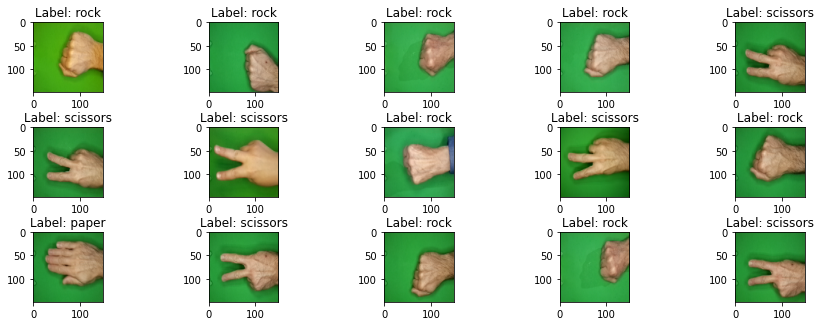

In [23]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(X[i])
    plt.title(f'Label: {labels[y[i]]}')

#<b> DATA MODELING</b>

In [24]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 8)         1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 8)        0

# <b>TRAINING MODEL</b>

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [27]:
historyModel = model.fit(
    train_data,
    epochs = 20,
    validation_data = val_data)

Epoch 1/20
41/41 [==============================] - 45s 1s/step - loss: 1.0561 - accuracy: 0.4322 - val_loss: 0.9553 - val_accuracy: 0.5634
Epoch 2/20
41/41 [==============================] - 50s 1s/step - loss: 0.9166 - accuracy: 0.5762 - val_loss: 0.8053 - val_accuracy: 0.6779
Epoch 3/20
41/41 [==============================] - 45s 1s/step - loss: 0.7719 - accuracy: 0.6936 - val_loss: 0.5623 - val_accuracy: 0.8122
Epoch 4/20
41/41 [==============================] - 45s 1s/step - loss: 0.5715 - accuracy: 0.7812 - val_loss: 0.3919 - val_accuracy: 0.8870
Epoch 5/20
41/41 [==============================] - 43s 1s/step - loss: 0.4939 - accuracy: 0.8087 - val_loss: 0.3883 - val_accuracy: 0.8611
Epoch 6/20
41/41 [==============================] - 45s 1s/step - loss: 0.4267 - accuracy: 0.8331 - val_loss: 0.3613 - val_accuracy: 0.8809
Epoch 7/20
41/41 [==============================] - 43s 1s/step - loss: 0.3985 - accuracy: 0.8666 - val_loss: 0.2450 - val_accuracy: 0.9267
Epoch 8/20
41/41 [==

In [28]:
model.save_weights('/content/drive/MyDrive/Dataset KB/model.h5')

#<b>TEST DAN EVALUASI MODEL</b>

Saving gunting.jpeg to gunting (3).jpeg
1/1 [==============================] - 0s 223ms/step
Scissor


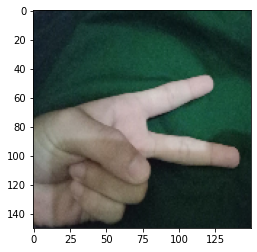

In [29]:
from google.colab import files
import keras
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = keras.utils.load_img(path, target_size = (150, 150))
  
  imgplot = plt.imshow(img)
  x = keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)  
  if classes[0,0] == 1:
    print('Paper')
  elif classes[0,1] == 1:
    print('Rock')
  else:
    print('Scissor')

1/1 [==============================] - 0s 45ms/step
Scissor


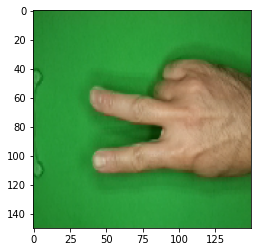

In [30]:
import keras

uploaded = os.path.join('/content/drive/MyDrive/Dataset KB/rockpaperscissors/scissors/0zoQAmDFXehOZsAp.png')
img = keras.utils.load_img(uploaded, target_size = (150, 150))

imgplot = plt.imshow(img)
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)
if classes[0,0] == 1:
  print('Paper')
elif classes[0,1] == 1:
  print('Rock')
elif classes[0,2] == 1:
    print('Scissor')

1/1 [==============================] - 0s 49ms/step
Rock


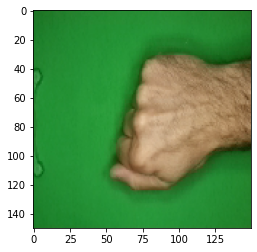

In [31]:
import keras

uploaded = os.path.join('/content/drive/MyDrive/Dataset KB/rockpaperscissors/rock/0P6uxM8Vr1DwySHe.png')
img = keras.utils.load_img(uploaded, target_size = (150, 150))

imgplot = plt.imshow(img)
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)
if classes[0,0] == 1:
  print('Paper')
elif classes[0,1] == 1:
  print('Rock')
elif classes[0,2] == 1:
    print('Scissor')

1/1 [==============================] - 0s 78ms/step
Paper


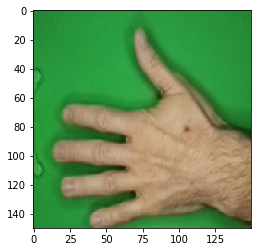

In [32]:
import keras

uploaded = os.path.join('/content/drive/MyDrive/Dataset KB/rockpaperscissors/paper/14K62H4KG1hg5qiJ.png')
img = keras.utils.load_img(uploaded, target_size = (150, 150))

imgplot = plt.imshow(img)
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)
if classes[0,0] == 1:
    print('Paper')
elif classes[0,1] == 1:
    print('Rock')
elif classes[0,2] == 1:
    print('Scissor')

<b>VISUALISASI MODEL LOSS</b>

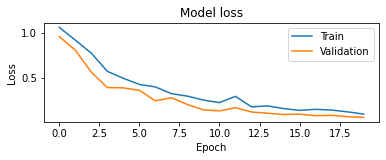

In [33]:
plt.subplot(2, 1, 1)
plt.plot(historyModel.history['loss'])
plt.plot(historyModel.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

<b>VISUALISASI MODEL ACCURACY</b>

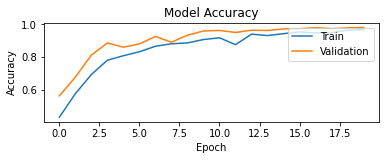

In [34]:
plt.subplot(2, 1, 2)
plt.plot(historyModel.history['accuracy'])
plt.plot(historyModel.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

<b>EVALUASI MODEL MENGGUNAKAN TEST DATA</b>

In [35]:
model.evaluate(test_data)

7/7 [==============================] - 2s 272ms/step - loss: 0.0978 - accuracy: 0.9683


[0.09782598167657852, 0.9683257937431335]